# 타이타닉 데이터셋 분석 및 생존자/사망자 예측
인공지능융합학부
김지연 (2022100854)

## 0. kaggle titanic tutorial (https://www.kaggle.com/code/alexisbcook/titanic-tutorial) 기반으로 성별별로 생존자 분석, 예측
* 실전으로 들어가기 전, 분석 연습

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [91]:
train_data = pd.read_csv("./train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
test_data = pd.read_csv("./test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


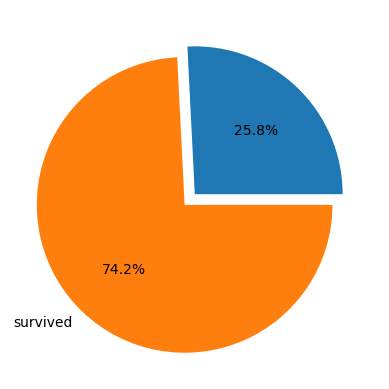

%of women who survived: 0.7420382165605095


In [93]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

women_surv = [1-rate_women, rate_women]
labels = ['','survived']

explode = [0, 0.10]

plt.pie(women_surv, labels = labels, autopct='%.1f%%',explode=explode)
plt.show()
print("%of women who survived:", rate_women)

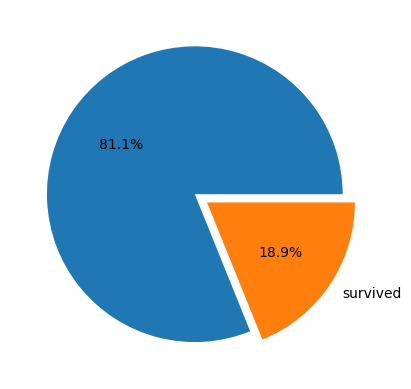

% of men who survived: 0.18890814558058924


In [94]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

men_surv = [1-rate_men, rate_men]
labels = ['','survived']


plt.pie(men_surv, labels = labels, autopct='%.1f%%', explode=explode)
plt.show()

print("% of men who survived:", rate_men)

In [95]:

from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId' : test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index = False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


## 1. 데이터 시각화
1. 성별
2. 클래스
3. 나이


In [96]:
df = pd.read_csv("./train.csv",index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


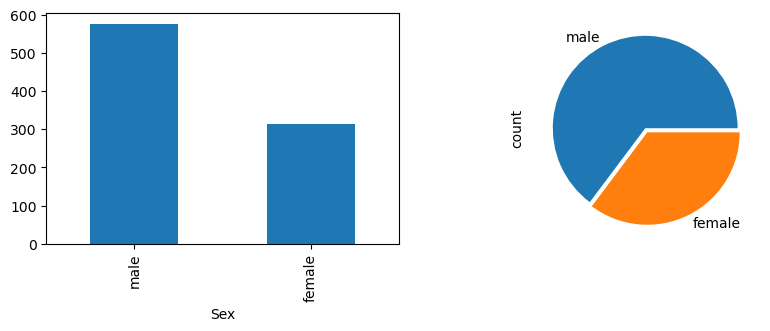

In [97]:

fig, axes = plt.subplots(1, 2, dpi=100, figsize = (10,3))
df["Sex"].value_counts().plot(kind = "bar", ax = axes.flat[0])
df["Sex"].value_counts().plot(kind = "pie", ax = axes.flat[1], explode= [0, 0.05])
plt.show()

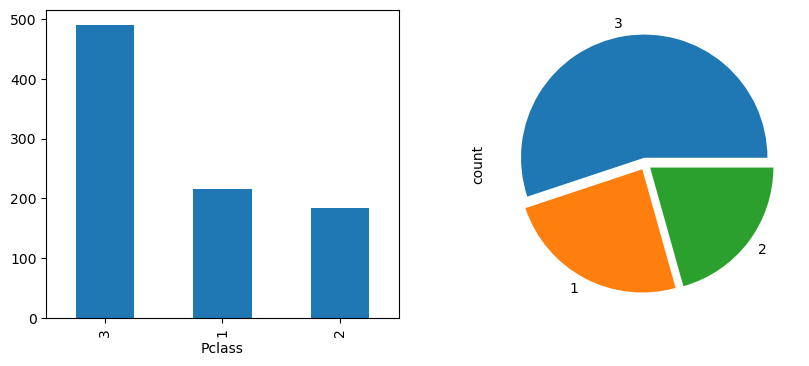

In [98]:
fig, axes = plt.subplots(1, 2, dpi=100, figsize = (10,4))
df["Pclass"].value_counts().plot(kind = "bar", ax = axes.flat[0], )
df["Pclass"].value_counts().plot(kind = "pie", ax = axes.flat[1], explode= [0.05, 0.05, 0.05])
plt.show()

<Axes: >

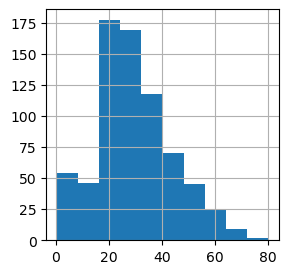

In [99]:
fig, axes = plt.subplots(1, 1, dpi=100, figsize = (3,3))
df["Age"].hist()


## 2. 가설 및 분석
  타이타닉 데이터를 살펴보며 분석 및 가설을 세워보도록 한다. 분석 과정이나, 방법 등은 Kaggle에서 Pedro Gonçalves의  "titanic-a-complete-approach-for-data-scientists" ((https://www.kaggle.com/code/pedrodematos/titanic-a-complete-approach-for-data-scientists) )를 참고한다. 

  소문에 따르면, 실제로 타이타닉 사고가 났을 때, 아이와 여성을 최우선으로 보트에 태웠다고 한다. 이는 소문일지 데이터 분석으로 알아보도록 한다.

### 1. 남성과 여성 중 누가 더 많이 죽었는가
1. 남녀 성비에 따른 생존, 사망 구분

<Axes: title={'center': 'female'}, ylabel='Survived'>

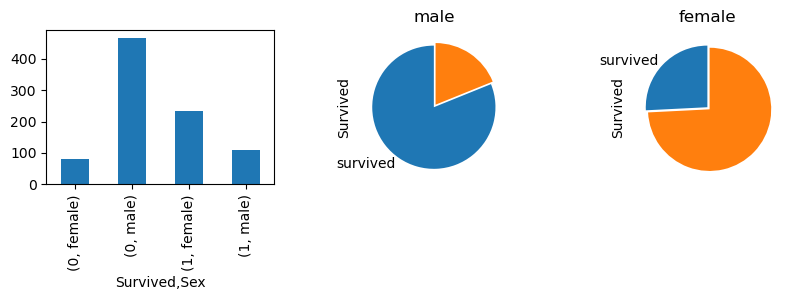

In [100]:

fig, axes = plt.subplots(1, 3, dpi=100, figsize = (10,2))
# df.groupby()[].count().plot(kind = "bar", ax =  axes.flat[0])
df.groupby(["Survived","Sex" ])["Sex"].count().plot(kind = "bar", ax =  axes.flat[0])
# .pie(men_surv, labels = labels, autopct='%.1f%%', explode=explode, axes.flat[1])
labels = ['survived' , ' ']
df[df["Sex"] == "male"].groupby(["Survived","Sex" ])["Survived"].count().plot(kind = "pie", labels = labels, ax = axes.flat[1], explode= [0, 0.05], startangle=90,  title = "male")
df[df["Sex"] == "female"].groupby(["Survived","Sex" ])["Survived"].count().plot(kind = "pie",labels = labels, ax = axes.flat[2], explode= [0, 0.05], startangle = 90,   title = "female" )




2. 생존, 비생존 각각 남녀 비율 분석

<Axes: title={'center': ' non-Survived'}, ylabel='Survived'>

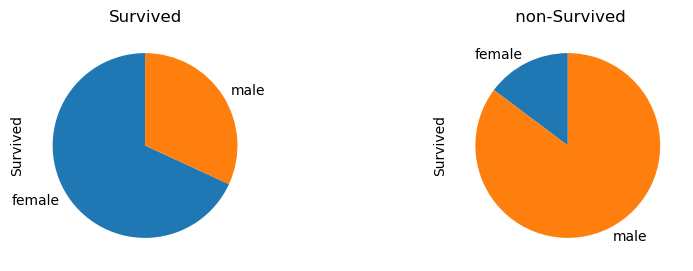

In [101]:

fig, axes = plt.subplots(1, 2, dpi=100, figsize = (10,3))
labels = ['female' , 'male']
df[(df["Survived"] == 1)].groupby(["Survived","Sex" ])["Survived"].count().plot(kind = "pie", labels = labels, ax =  axes.flat[0], title = "Survived",  startangle=90)
df[(df["Survived"] == 0)].groupby(["Survived","Sex" ])["Survived"].count().plot(kind = "pie", labels = labels, ax =  axes.flat[1], title = " non-Survived",  startangle=90)


* 남성은 높은 활률로 사망하고, 여성은 높은 확률로 생했다는 것을 알 수 있다
* 생존자 중에서 여성이 많으며, 비생존자에선 남성의 비율이 높다는 것을 알 수 있다.

###  2. 나이별 생존도 

C:\Users\jy\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jy\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jy\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


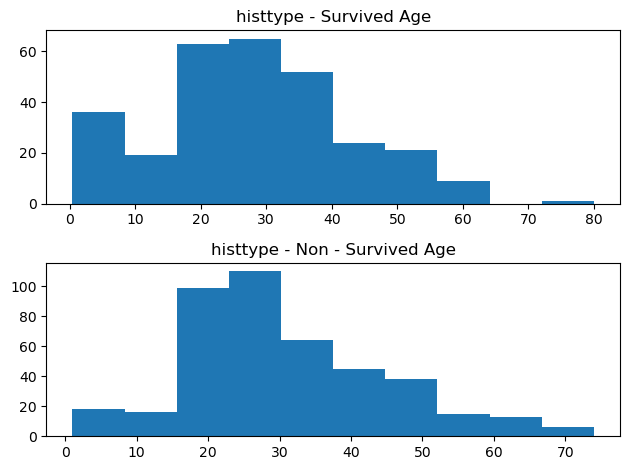

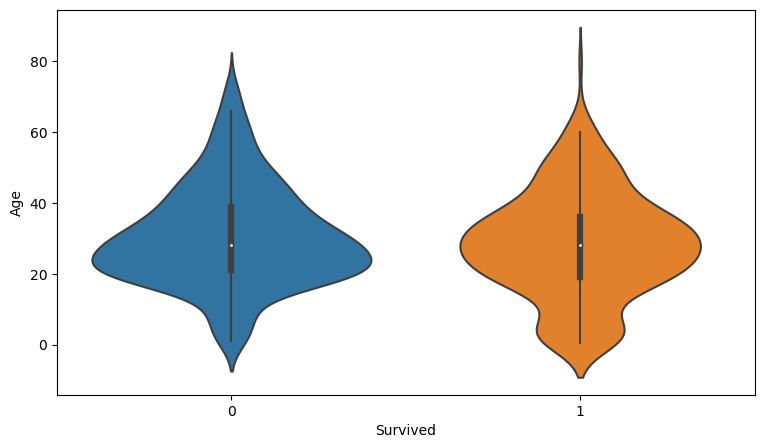

In [102]:
import seaborn as sns
df_survivors = df[df['Survived'] == 1]
df_nonsurvivors = df[df['Survived'] == 0]

plt.subplot(2, 1, 1)   
plt.hist(df_survivors["Age"])
plt.title('histtype - Survived Age')

plt.subplot(2, 1, 2)   
plt.hist(df_nonsurvivors["Age"])
plt.title('histtype - Non - Survived Age')
plt.tight_layout()

plt.figure(figsize = (9,5))
sns.violinplot(x = "Survived", y = "Age", data = df)

plt.show()


* 전체적으로 생존과 비생존의 비율은 비슷하나, 나이가 20 이하는 생존한 비율이 더 높다는 것을 알 수 있다.

### 3. 가족 별 생존도

앞서 아이와 여자가 최우선으로 구출됐는가에 대해 타이타닉 데이터를 분석해 보았을 때, 실제 소문과 데이터가 일치한다. 생존자와 비생존자 나이를 분석한 그래프에서  0~20세 사이에서 두 모형의 차이가 있다. 20세 이하의 유아-청소년이라면 보호자와 같이 탑승했을 확률이 높다고 본다. 그렇다면 가족과 함께 탑승한 사람은, 생존할 확률이 더 높게 나오는 가? titanic.csv 에서는 'parch'를 통해 부모, 혹 자녀수를 알수 있다. 이에 대해 분석 해보도록 한다.

<Axes: title={'center': ' Parch X'}, ylabel='Survived'>

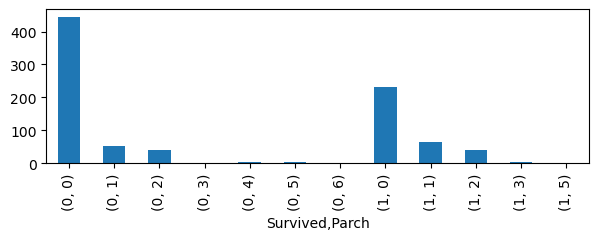

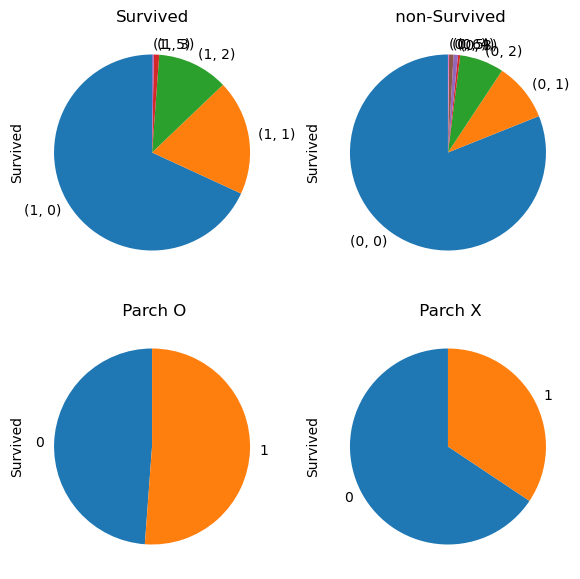

In [103]:
fig, axes = plt.subplots(1,1, dpi=100, figsize = (7,2))


df.groupby(["Survived","Parch" ])["Parch"].count().plot(kind = "bar", )
# .pie(men_surv, labels = labels, autopct='%.1f%%', explode=explode, axes.flat[1])

fig, axes = plt.subplots(2,2, dpi=100, figsize = (7,7))

df[(df["Survived"] == 1)].groupby(["Survived","Parch" ])["Survived"].count().plot(kind = "pie",  ax =  axes.flat[0], title = "Survived",  startangle=90)
df[(df["Survived"] == 0)].groupby(["Survived","Parch" ])["Survived"].count().plot(kind = "pie", ax =  axes.flat[1], title = " non-Survived",  startangle=90)
df[(df["Parch"] > 0 )].groupby(["Survived" ])["Survived"].count().plot(kind = "pie",  ax =  axes.flat[2],  startangle=90, title = " Parch O")
df[(df["Parch"] == 0 )].groupby(["Survived" ])["Survived"].count().plot(kind = "pie",  ax =  axes.flat[3],  startangle=90,  title = " Parch X")


* 자식이 있는 경우가, 없는 경우보다 생존비율이 더 높다는 것을 알 수 있다.

### 4. 클래스 별 생존도
1. 클래스 별 지불한 요금 분석

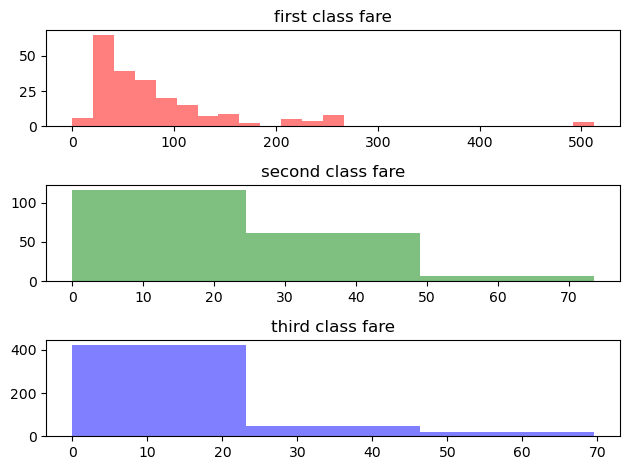

In [104]:




df_FC = df[df['Pclass'] == 1]
df_SC = df[df['Pclass'] == 2]
df_TC = df[df['Pclass'] == 3]
# df_FC ["Fare"].hist( bins = 10)
# df_SC ["Fare"].hist( bins = 10)
# df_TC ["Fare"].hist( bins = 10)
plt.subplot(3, 1, 1)   
plt.hist(df_FC ["Fare"],  color='r' , alpha = 0.5, bins = 25,)
plt.title("first class fare")  
plt.subplot(3, 1, 2)   
plt.hist(df_SC ["Fare"],  color='g' , alpha = 0.5, bins = 3, )
plt.title("second class fare")
plt.subplot(3, 1, 3)   
plt.hist(df_TC ["Fare"],  color='b', alpha = 0.5, bins = 3, )
plt.title("third class fare")
plt.tight_layout()
plt.show()


* 클래스 별 가격을 정리한다.

2. 클래스 별 생존, 사망 구분.

<Axes: title={'center': 'third class'}, ylabel='Pclass'>

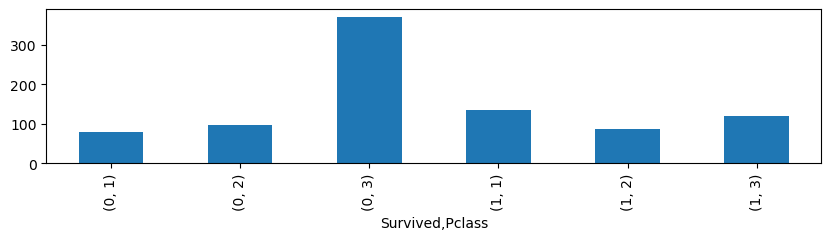

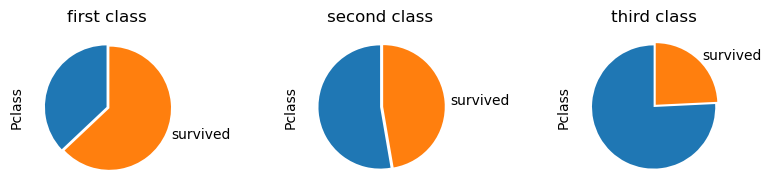

In [105]:
fig, axes = plt.subplots(1,1, dpi=100, figsize = (10,2))

df.groupby(["Survived","Pclass" ])["Pclass"].count().plot(kind = "bar", )

fig, axes = plt.subplots(1,3, dpi=100, figsize = (10,2))


labels = ['' , 'survived']
df[df['Pclass'] == 1].groupby(["Survived",'Pclass' ])["Pclass"].count().plot(kind = "pie", labels = labels, ax = axes.flat[0], explode= [0, 0.05], startangle=90,  title = "first class")
df[df['Pclass'] == 2].groupby(["Survived",'Pclass'])["Pclass"].count().plot(kind = "pie",labels = labels, ax = axes.flat[1], explode= [0, 0.05], startangle = 90,   title = "second class" )
df[df['Pclass'] == 3].groupby(["Survived",'Pclass'])["Pclass"].count().plot(kind = "pie",labels = labels, ax = axes.flat[2], explode= [0, 0.05], startangle = 90,   title = "third class" )



* 비교적으로 1등 클래스가 생존율이 더 높으며 차례대로 떨어져 3등의 생존률은 낮다는 것을 알 수 있다.

3. 생존, 비생존 내 클래스 비율 분석

<Axes: title={'center': ' non-Survived'}, ylabel='Survived'>

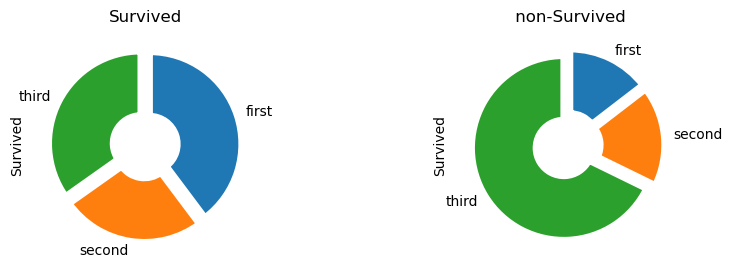

In [106]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
fig, axes = plt.subplots(1, 2, dpi=100, figsize = (10,3))
labels = ['first' , 'second', 'third']
df[(df["Survived"] == 1)].groupby(["Survived","Pclass" ])["Survived"].count().plot(kind = "pie", labels = labels, ax =  axes.flat[0], title = "Survived",  startangle=90, counterclock=False, explode=[0.05,0.05,0.05], wedgeprops=wedgeprops)
df[(df["Survived"] == 0)].groupby(["Survived","Pclass" ])["Survived"].count().plot(kind = "pie", labels = labels, ax =  axes.flat[1], title = " non-Survived",   startangle=90, counterclock=False, explode=[0.05,0.05,0.05], wedgeprops=wedgeprops)


* 생존한 사람들 사이에서는 세 클래스의 비율이 비슷하지만, 사망한 사람들 중에서는 3등 클래스가 가장 많이 죽었다는 것을 알 수 있다.

## 2. 특징공학으로 기존 변수를 활용해 새로운 변수 생성하기

* https://seo00.tistory.com/61?category=1000257 를 참고한다

In [107]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [108]:
df.head()



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


## 3.생존자 예측하기
사이트 (https://velog.io/@fiifa92/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0%EC%9C%BC%EB%A1%9C-%EC%88%98%ED%96%89%ED%95%98%EB%8A%94-%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89-%EC%83%9D%EC%A1%B4%EC%9E%90-%EC%98%88%EC%B8%A1)를 참고한다.
1. 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환

In [109]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ["Pclass", "Sex", "SibSp", "Parch", 'Embarked', 'Title']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

titanic_df = encode_features(df)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,12
2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,13
3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,9
4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,13
5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,12


2. 내역 정리 및 함수 생성

In [110]:
# Null 처리 함수
def fill_na(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('S', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

# 불필요한 칼럼 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    
    return df


def transform_features(df):
    df = fill_na(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

3. 생존자 예측

In [111]:
titanic_df = pd.read_csv('./train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)